In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hosammhmdali/gold-price-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/parkhyunsik/.cache/kagglehub/datasets/hosammhmdali/gold-price-dataset/versions/1


In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score ,mean_squared_error

In [27]:
csv_path = os.path.join(path, "gld_price_data.csv")
df=pd.read_csv(csv_path)
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# Display the first 5 rows 
df.head().style.background_gradient('autumn_r')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [ ]:
# Display the last 5 rows 
df.tail(5).style.background_gradient(cmap='seismic')

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118
2289,5/16/2018,2725.780029,122.543800,14.405800,15.454200,1.182033


In [ ]:
#Display the sample 5 rows
df.sample(5).style.background_gradient(cmap='gist_rainbow')

,Date,SPX,GLD,USO,SLV,EUR/USD
1295,11/29/2013,1805.810059,120.699997,33.459999,19.240000,1.360396
405,11/20/2009,1091.380005,112.940002,39.419998,18.219999,1.486392
1872,6/27/2016,2000.540039,126.680000,11.190000,16.870001,1.101503
2205,1/4/2018,2723.989990,125.459999,12.370000,16.230000,1.201043
1080,12/7/2012,1418.069946,165.160004,31.530001,32.029999,1.296344


In [ ]:
print(df.shape)
print(f"the number of rows in data {df.shape[0]}".title())
print(f"the number of features in data {df.shape[1]}".title())


(2290, 6)
The Number Of Rows In Data 2290
The Number Of Features In Data 6


In [ ]:
#information data :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#Description of number data
df.describe().style.background_gradient(cmap='RdYlBu_r')

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


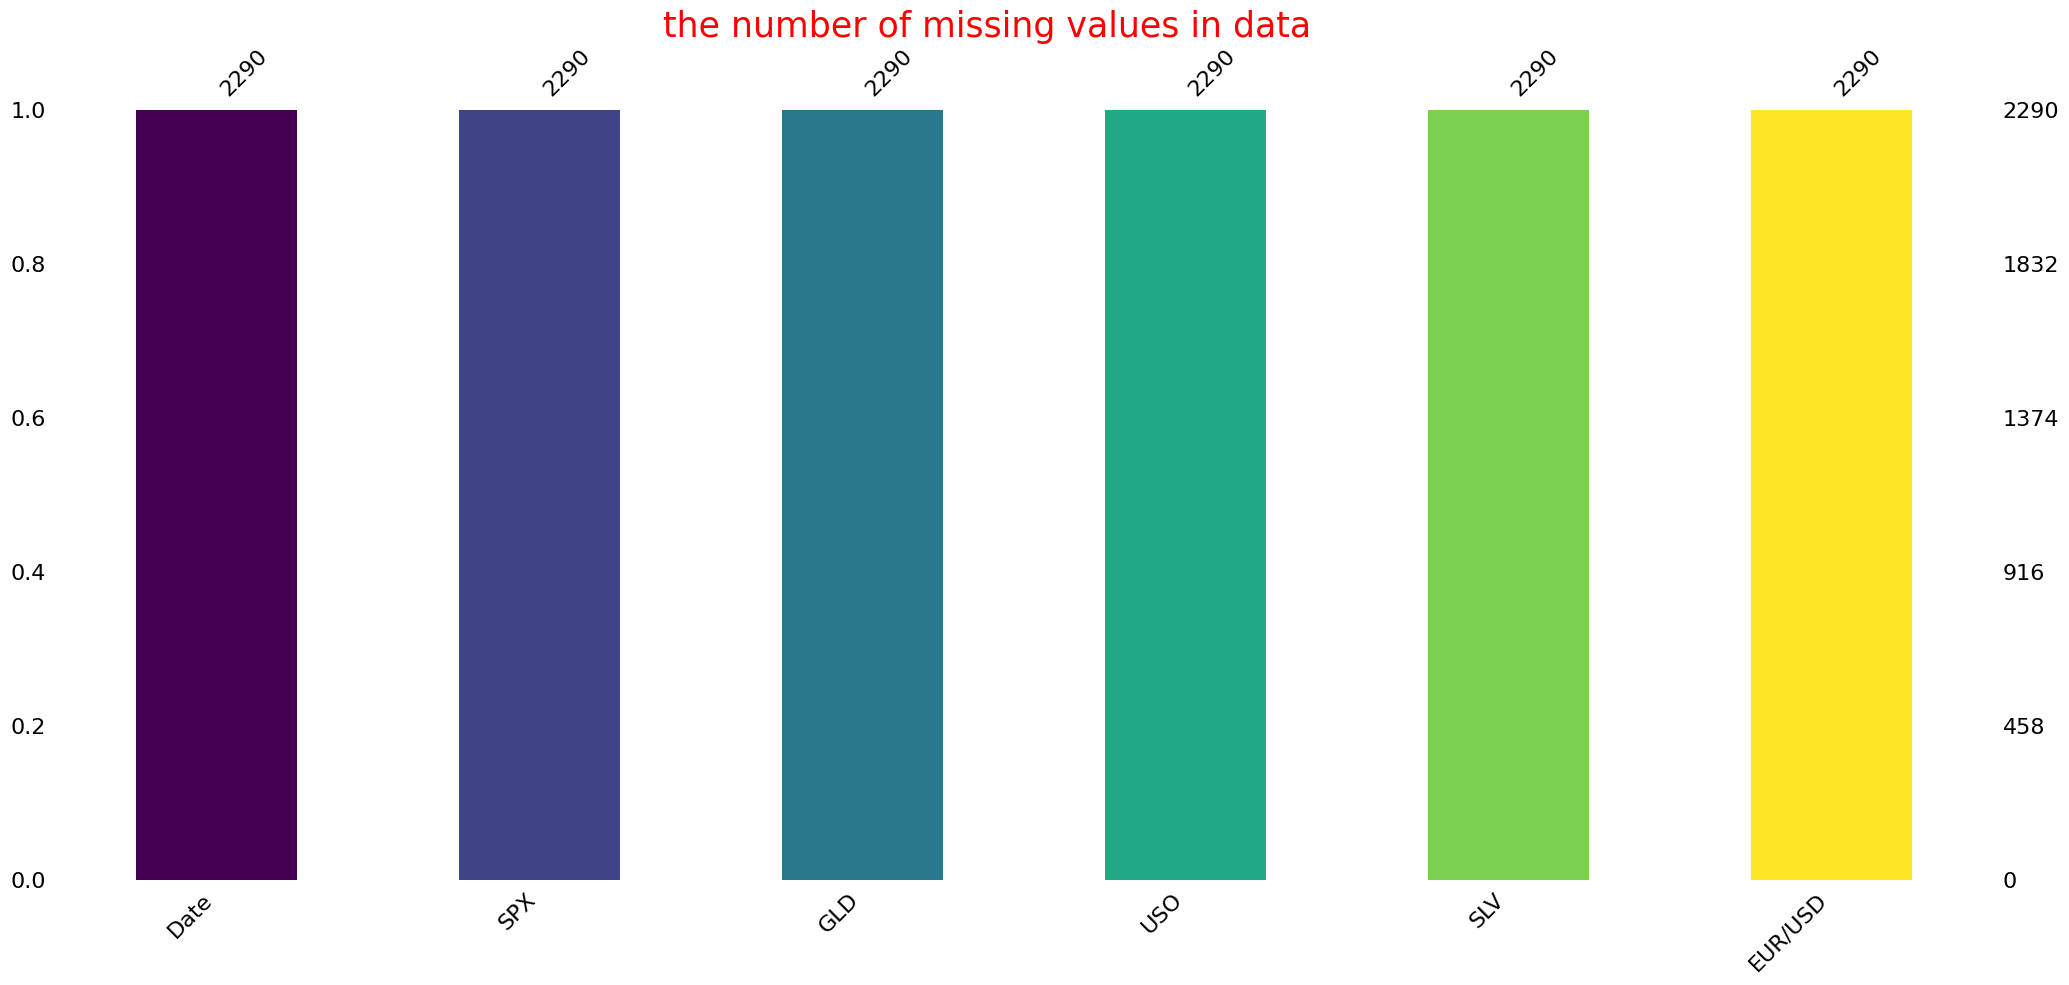

In [ ]:
len_col=len(df.columns)
colors=plt.cm.viridis(np.linspace(0,1,len_col))
mse.bar(df,color=colors)
plt.suptitle('the number of missing values in data ',size=25,color='red')
plt.show()

In [ ]:
print(f"the number of duplicated in data : {df.duplicated().sum()}".title())

The Number Of Duplicated In Data : 0


In [ ]:
# all columns
df.columns.to_list()

['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

In [ ]:
#Data types for features
df.dtypes 

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

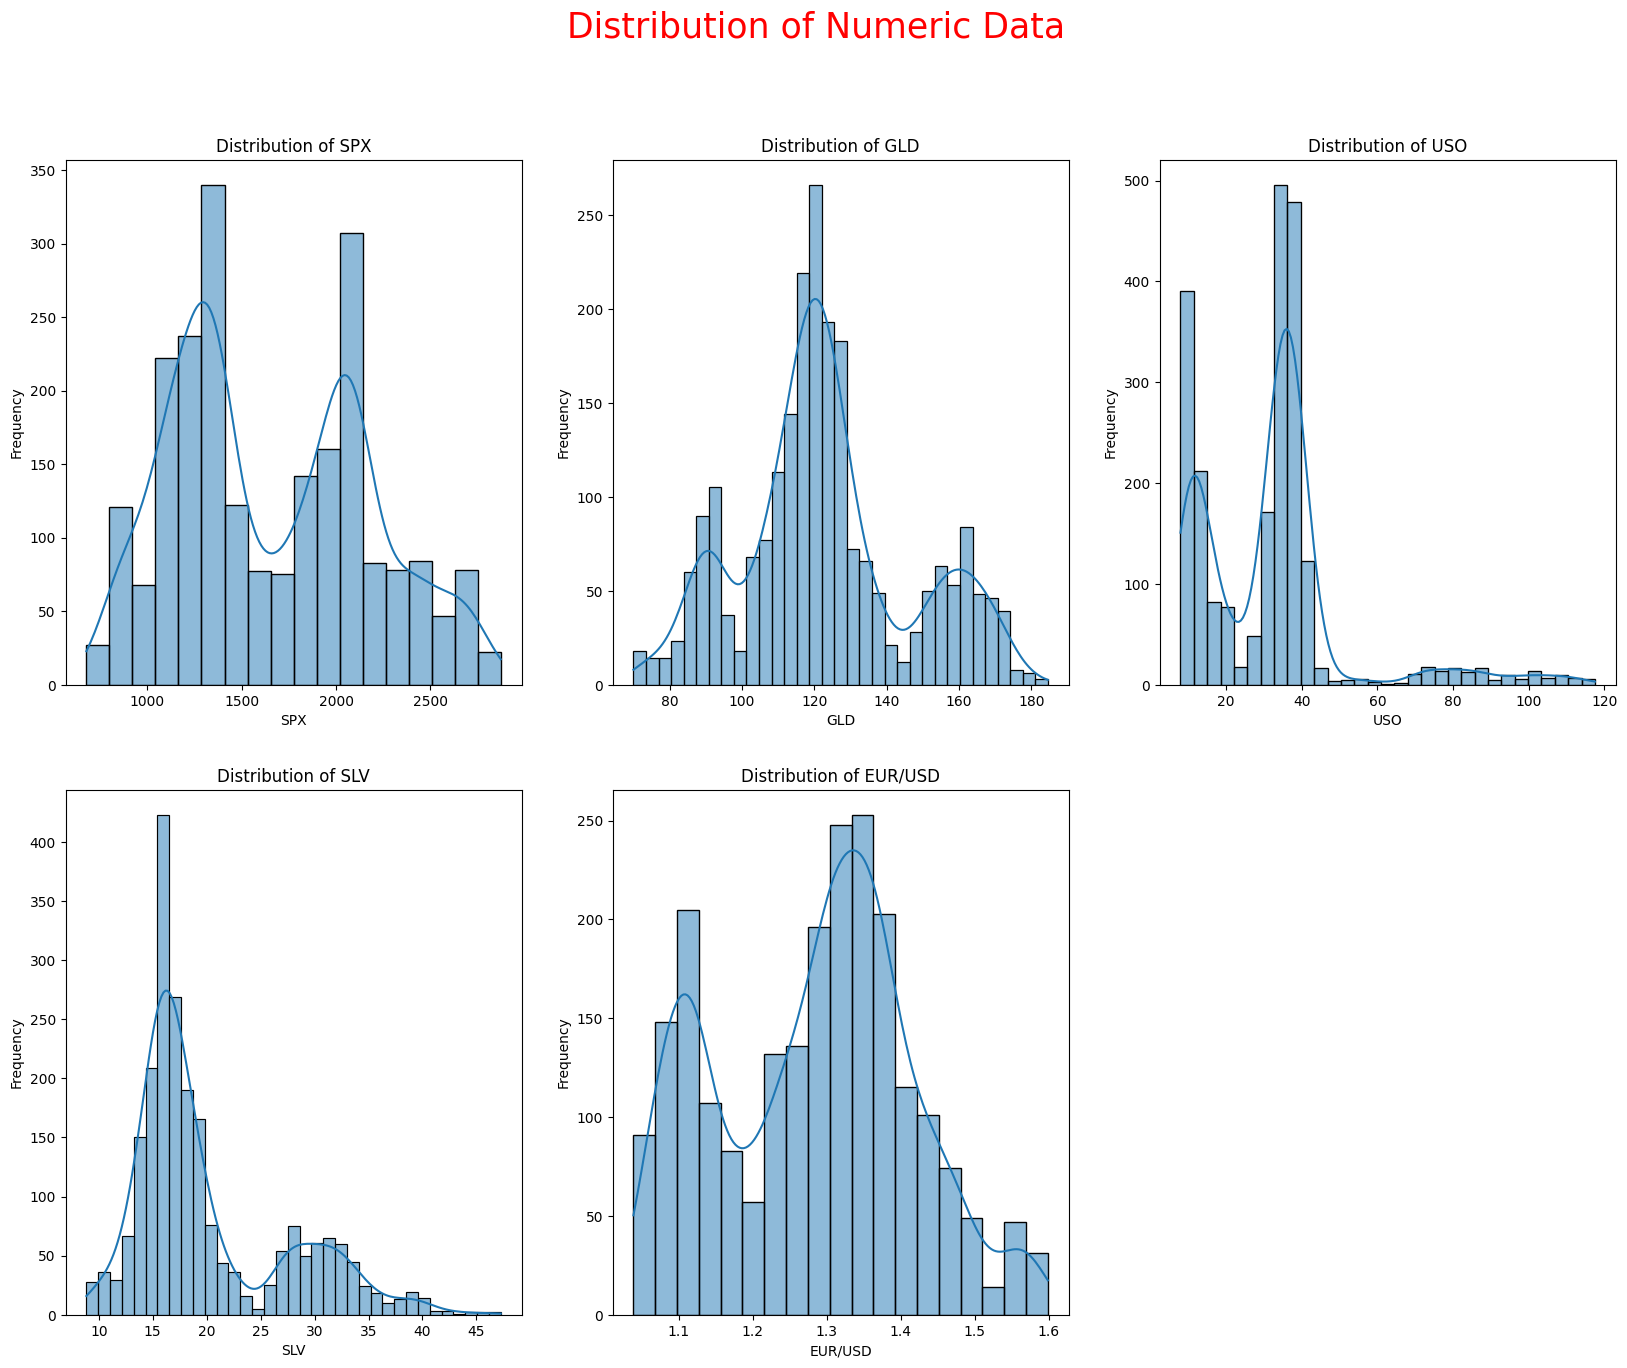

In [ ]:
col=df.select_dtypes(np.number).columns.to_list()
def histogram_visualization(int_col):
    n_c=3
    n_r=(len(int_col)+n_c-1)//n_c
    plt.figure(figsize=(20,15))
    for i,col in enumerate(int_col):
        plt.subplot(n_r,n_c,i+1)
        sns.histplot(data=df,x=col,kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.suptitle('Distribution of Numeric Data',color='red',size=25)
    plt.show()
histogram_visualization(col)

In [ ]:
def pairplot(data):
        
    sns.pairplot(df) 
    plt.suptitle('Relationships Between Numerical Features')
    plt.show()    


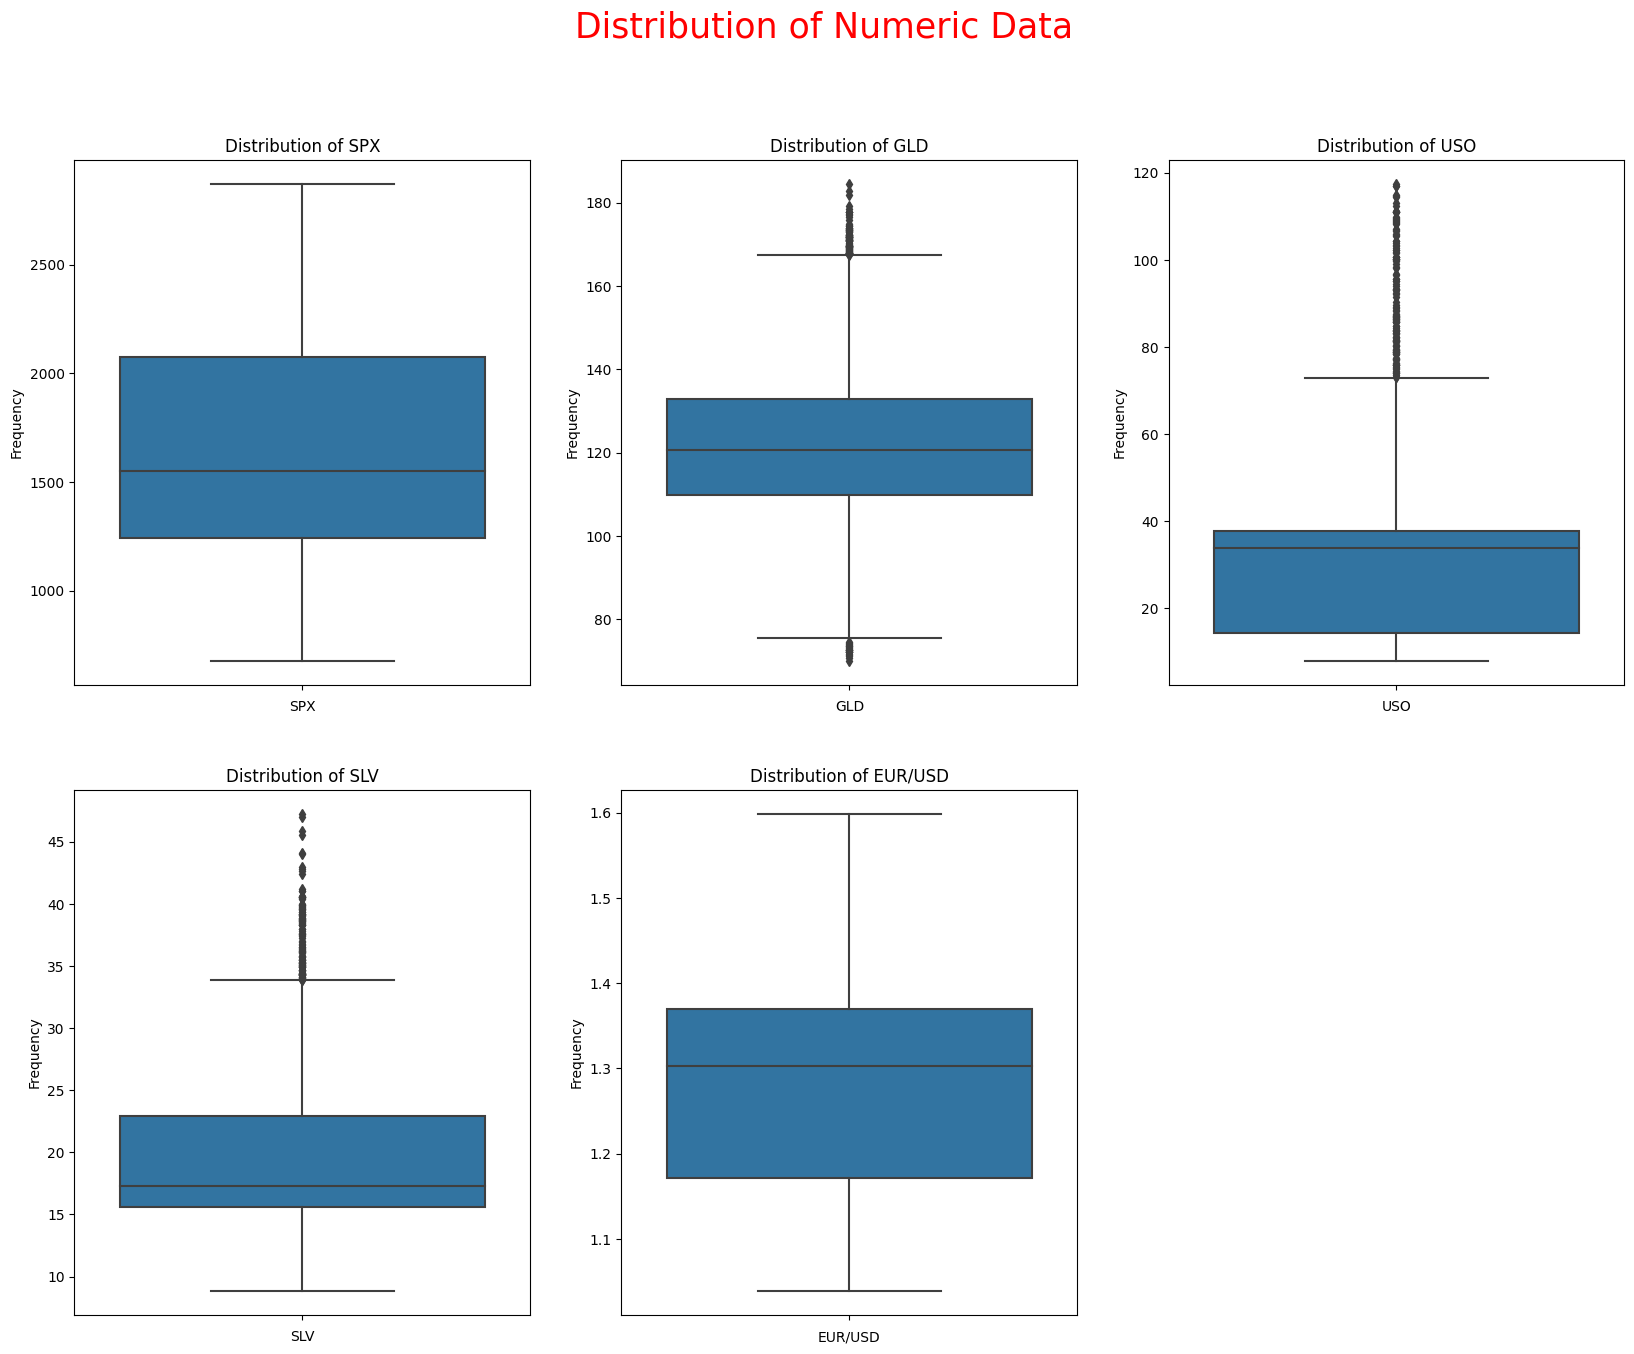

In [ ]:
col=df.select_dtypes(np.number).columns.to_list()
def box_plot(int_col):
    n_c=3
    n_r=(len(int_col)+n_c-1)//n_c
    plt.figure(figsize=(20,15))
    for i,col in enumerate(int_col):
        plt.subplot(n_r,n_c,i+1)
        sns.boxplot(data=df,y=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.suptitle('Distribution of Numeric Data',color='red',size=25)
    plt.show()

box_plot(col)

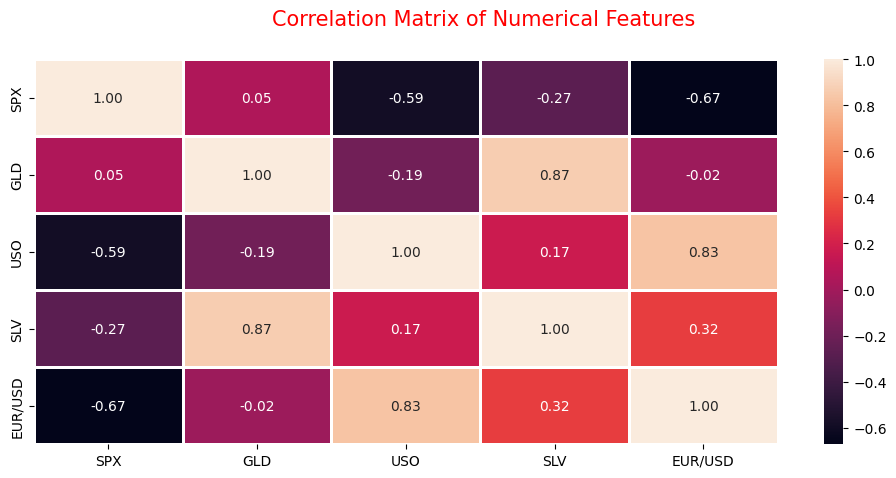

In [ ]:
correlation=df.select_dtypes(np.number).corr()
plt.figure(figsize=(12,5))
sns.heatmap(correlation,annot=True,fmt=".2f",linewidth=.9)
plt.suptitle('Correlation Matrix of Numerical Features',color='red',size=15)
plt.show()

In [28]:
# features engineering
df['year']=pd.to_datetime(df['Date']).dt.year

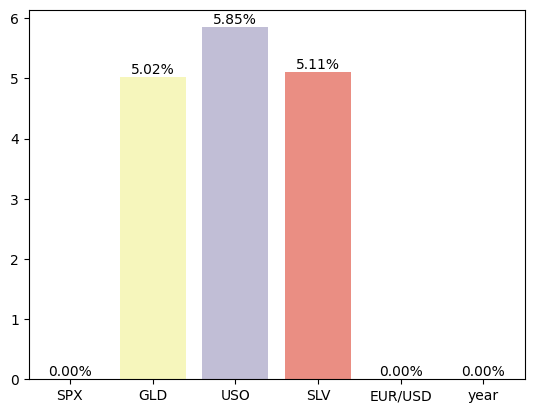

In [ ]:
def outlierspercentage(df):
    out_liers_precatege=[]
    columns=df.drop(columns=['Date'],axis=1).columns.to_list()
    for col in columns:
        q1=df[col].quantile(.25)
        q3=df[col].quantile(.75)
        iqr=q3-q1
        lower_bounds=q1-iqr*1.5
        upper_bounds=q3+iqr*1.5
        out_liers=df.loc[(df[col]<lower_bounds)|(df[col]>upper_bounds),col]
        out_liers_precatege.append(round(len(out_liers)/len(df)*100,2))

    sns.barplot(x=columns,y=out_liers_precatege,palette='Set3')
    for i,v in enumerate(out_liers_precatege):
        plt.text(i,v+.005,f"{v:.2f}%",ha='center',va='bottom',fontsize=10)
    plt.show()
outlierspercentage(df)
    

In [29]:
#handling out liers:
def handling_outliers(col):
    for col in col:
        q1=df[col].quantile(.25)
        q3=df[col].quantile(.75)
        iqr=q3-q1
        lower_bounds=q1-iqr*1.5
        upper_bounds=q3+iqr*1.5
        df[col]=np.where(df[col]<lower_bounds,lower_bounds,df[col])
        df[col]=np.where(df[col]>upper_bounds,upper_bounds,df[col])
col=df.select_dtypes(np.number).columns.to_list()
handling_outliers(col)

In [30]:
x=df.drop(columns=['Date','GLD',])
y=df[['GLD']]
#train and test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,shuffle=True)

In [31]:
models={LinearRegression.__name__:LinearRegression(),
       Ridge.__name__:Ridge(),
       Lasso.__name__:Lasso(),
      RandomForestRegressor.__name__:RandomForestRegressor(),
     GradientBoostingRegressor.__name__:GradientBoostingRegressor(),
     BaggingRegressor.__name__:BaggingRegressor(),
    AdaBoostRegressor.__name__:AdaBoostRegressor() }
def use_models (models,X_train,X_test,y_train,y_test):
    df_result=pd.DataFrame(columns=['name_model','r2_score','mse','score_train','score_test'])
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_predict=model.predict(X_test)
        r_score=r2_score(y_test,y_predict)
        mse=np.sqrt(mean_squared_error(y_test,y_predict))
        score_train=model.score(X_train,y_train)
        score_test=model.score(X_test,y_test)
        df_result=pd.concat([df_result,pd.DataFrame({'name_model':[name],'r2_score':[r_score],'mse':[mse],'score_train':[score_train],'score_test':[score_test]})],ignore_index=True)
    return df_result
df_result=use_models(models,X_train,X_test,y_train,y_test)
df_result=df_result.sort_values(by='r2_score',ascending=False)


In [32]:
df_result

,name_model,r2_score,mse,score_train,score_test
5,BaggingRegressor,0.991606,2.103245,0.998519,0.991606
3,RandomForestRegressor,0.991540,2.111444,0.999201,0.991540
4,GradientBoostingRegressor,0.986832,2.634351,0.992135,0.986832
6,AdaBoostRegressor,0.947501,5.259952,0.949772,0.947501
1,Ridge,0.941214,5.566008,0.928756,0.941214
0,LinearRegression,0.941209,5.566245,0.928758,0.941209
2,Lasso,0.936785,5.771863,0.921895,0.936785


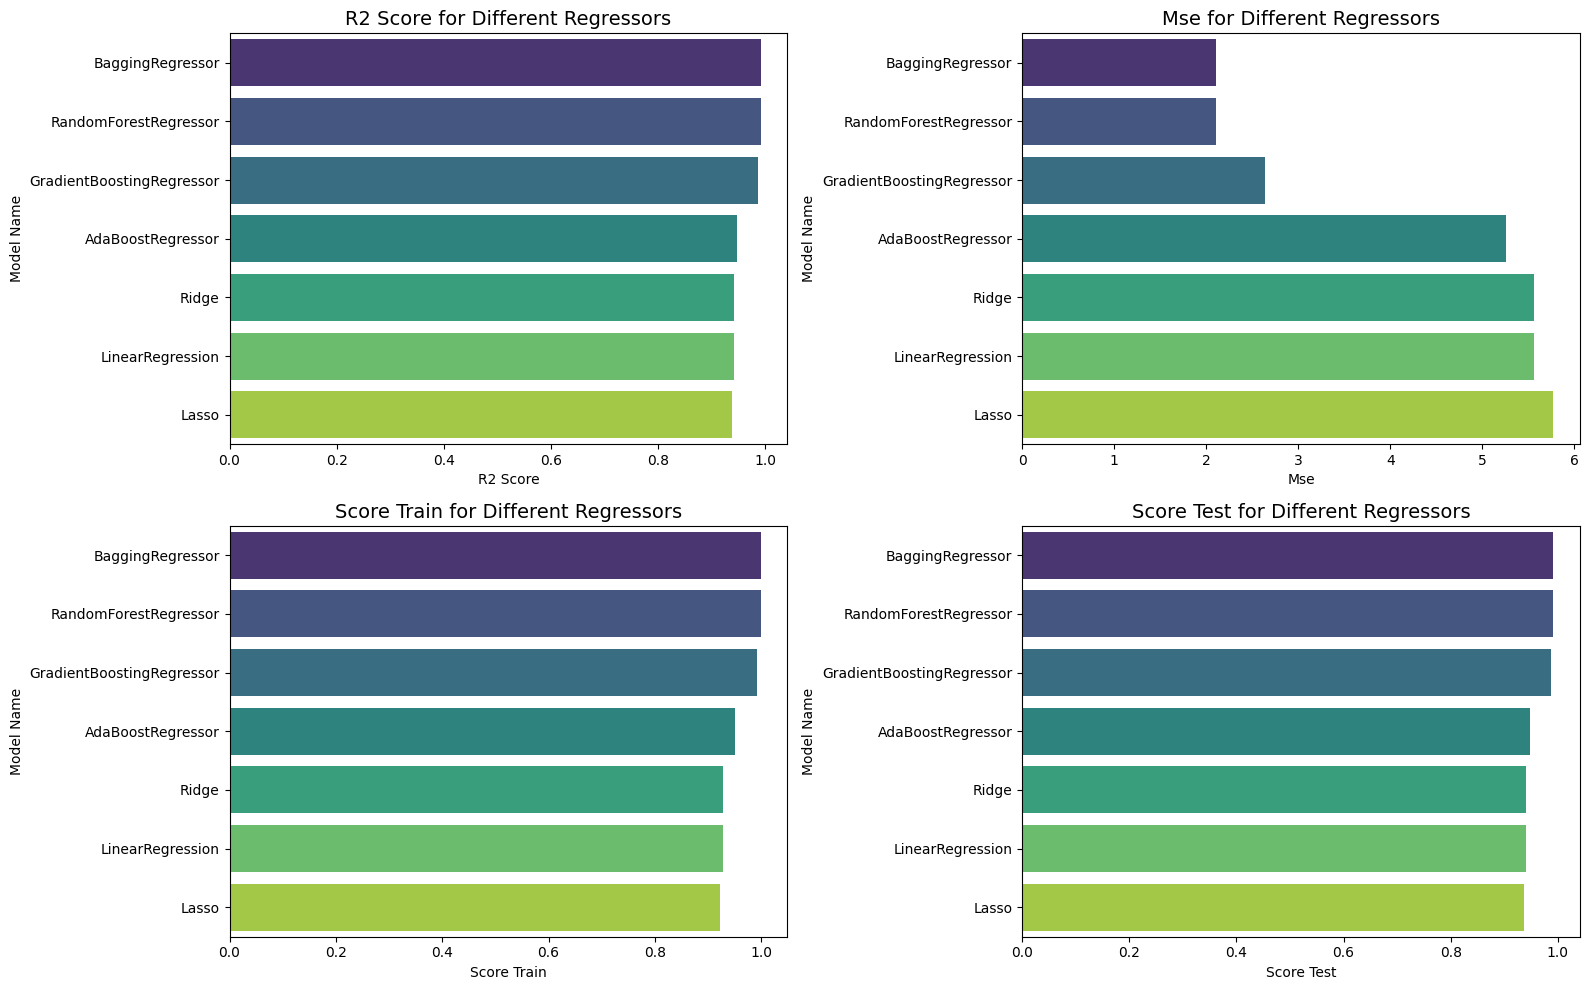

In [33]:

metrics = ['r2_score', 'mse', 'score_train', 'score_test']

plt.figure(figsize=(16, 10))

# Create subplots for each metric
for i , col in enumerate(metrics,1):
    plt.subplot(2,2,i)
    sns.barplot(data=df_result,x=col,y='name_model',palette='viridis')
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel('Model Name')
    plt.title(f'{col.replace("_", " ").title()} for Different Regressors', fontsize=14)

plt.tight_layout()    
plt.show()


In [34]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD,year
0,1/2/2008,1447.160034,84.860001,72.998754,15.1800,1.471692,2008.0
1,1/3/2008,1447.160034,85.570000,72.998754,15.2850,1.474491,2008.0
2,1/4/2008,1411.630005,85.129997,72.998754,15.1670,1.475492,2008.0
3,1/7/2008,1416.180054,84.769997,72.998754,15.0530,1.468299,2008.0
4,1/8/2008,1390.189941,86.779999,72.998754,15.5900,1.557099,2008.0
...,...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789,2018.0
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722,2018.0
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753,2018.0
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118,2018.0


In [35]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
# input_data = list(map(float, input('Enter SPX, USO, SLV, EUR/USD, year (separated by spaces): ').split()))
def prediction_gld(input_data):
    try:

        input_array = np.array(input_data).reshape(1, -1)

        prediction = model.predict(input_array)

        return (f"The predicted value is: {prediction[0]}")
    except ValueError as e:
        return (e)
input_data=[1447.160034	,72.998754,15.1800,1.471692,2008.0]
prediction_gld(input_data)

'The predicted value is: 85.04950012999998'